In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
url='https://drive.google.com/file/d/1VfCaU5vFVWsSYrvKQF2x9iS6I7KoWEVH/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df

,ss_username,cf_username,cf_rating,cc_username,cc_rating
0,eldnahon,slime,3449.0,peehs_moorhsum,3007.0
1,jora,NaN,NaN,uwi,2906.0
2,lala,NaN,NaN,kal013,2756.0
3,wesnerm,NaN,NaN,wmoise,2696.0
4,grebnesieh,grebnesieh,1703.0,grebnesieh,2673.0
...,...,...,...,...,...
11270,TeaPot,teapot,2677.0,NaN,NaN
11271,luosiyuan,tianbu,2882.0,NaN,NaN
11272,dorijanko,dorijanlendvaj,3120.0,NaN,NaN
11273,gamegame,gamegame,3218.0,NaN,NaN


In [57]:
df.columns

Index(['ss_username', 'cf_username', 'cf_rating', 'cc_username', 'cc_rating'], dtype='object')

In [58]:
df.drop(['ss_username', 'cf_username', 'cc_username'], axis=1, inplace=True)

In [59]:
df.columns

Index(['cf_rating', 'cc_rating'], dtype='object')

In [60]:
df.cc_rating.isnull().sum()

995

In [61]:
df.cf_rating.isnull().sum()

3838

In [66]:
df.dropna(subset=['cf_rating', 'cc_rating'], how='any', inplace=True)

In [67]:
df.cc_rating.isnull().sum()

0

In [68]:
df.cf_rating.isnull().sum()

0

In [69]:
df.shape

(6442, 2)

In [85]:
feature_name = "cc_rating"
target_name = "cf_rating"
x, y = df[[feature_name]], df[target_name]

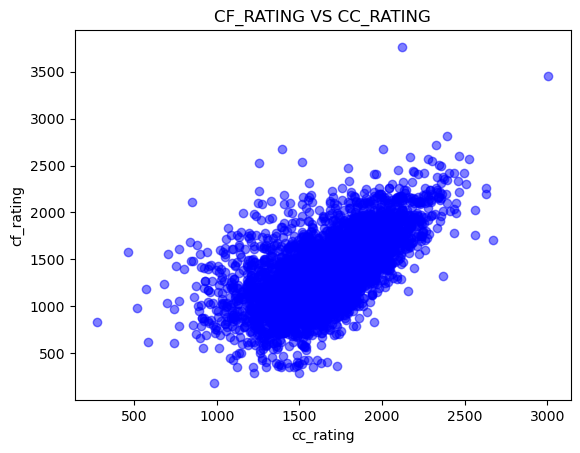

In [101]:
plt.scatter(x,y, color='blue', alpha=0.5)
plt.xlabel(feature_name)
plt.ylabel(target_name)
plt.title("CF_RATING VS CC_RATING")
plt.show()

Text(0.5, 1.0, 'REGRESSION PLOT')

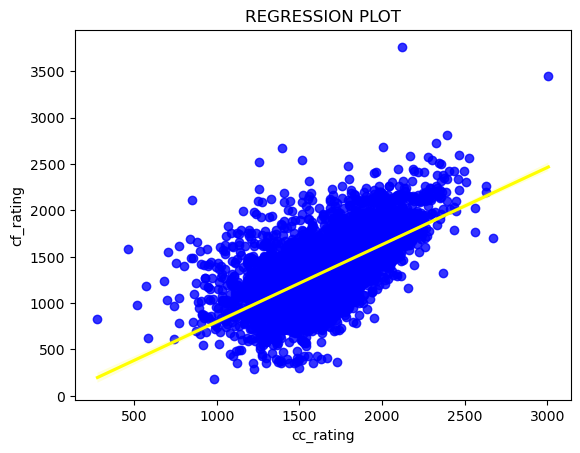

In [100]:
sns.regplot(x=x, y=y, scatter_kws={"color":'blue'}, line_kws={"color":'yellow'})
plt.title("REGRESSION PLOT")

Estimated coefficients:
Constant b_0 = -32.62926507315842
Slope of graph b_1 = 0.8315620555789337
Constant b_0 =  -32.62926507315842
Slope of graph b_1 =  0.8315620555789337


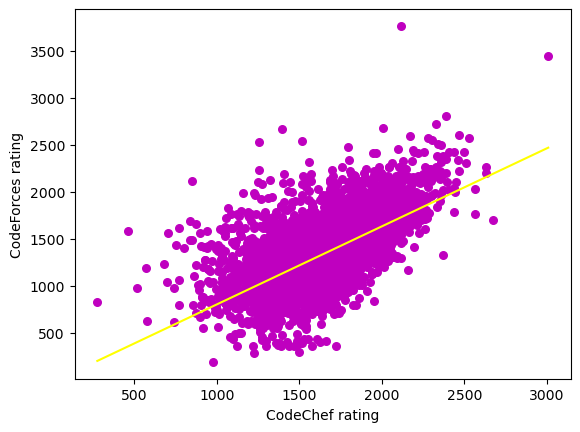

In [138]:
import numpy as np
import matplotlib.pyplot as plt
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    #Compute the covariance matrix of x
    x_center = x - m_x
    cov_matrix = x_center.T @ x_center

    cov_inv = np.linalg.inv(cov_matrix)
    
    b_1 = cov_inv @ x_center.T @ (y - m_y)
    b_0 = m_y - b_1 * m_x
    return (b_0, b_1)
  
def plot_regression_line(x, y, b_0, b_1):
    plt.scatter(x, y, color = "m",marker = "o", s = 30)
  
    # Plotting Regression line with predicted response vector
    y_pred = b_0 + b_1 * x
    plt.plot(x, y_pred, color = "yellow")
    plt.xlabel('CodeChef rating')
    plt.ylabel('CodeForces rating')
    plt.show()
  
b = estimate_coef(x, y)
print("Estimated coefficients:")
print("Constant b_0 =",b[0][0])
print("Slope of graph b_1 =",b[1][0])

# plotting regression line
plot_regression_line(x, y, b[0][0], b[1][0])

b_0 = -32.62926507315615
b_1 = 0.8315620555789324

def fun(codechef_rating):
    codeforces_rating=(codechef_rating*b_1)+b_0
    return codeforces_rating

NOW LETS DO IT FOR CONVERSION OF RATING FROM CF TO CC

In [148]:
x1, y1 = df[[target_name]], df[feature_name]

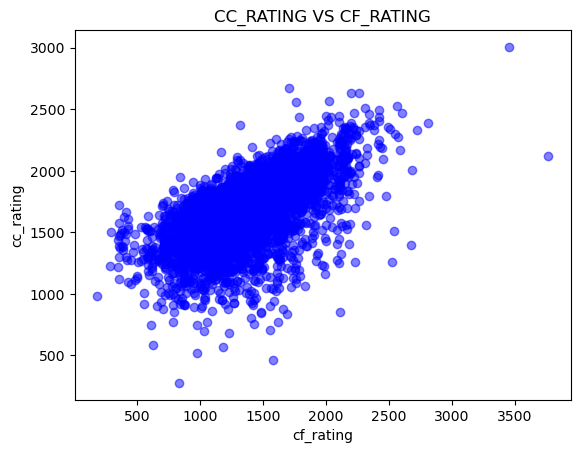

In [149]:
plt.scatter(x1,y1, color='blue', alpha=0.5)
plt.xlabel(target_name)
plt.ylabel(feature_name)
plt.title("CC_RATING VS CF_RATING")
plt.show()

Text(0.5, 1.0, 'REGRESSION PLOT')

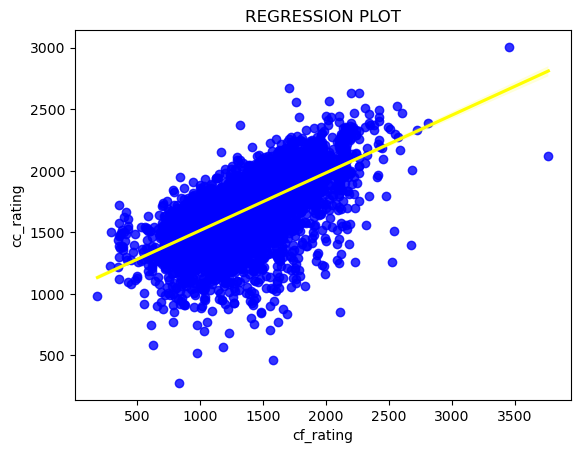

In [150]:
sns.regplot(x=x1, y=y1, scatter_kws={"color":'blue'}, line_kws={"color":'yellow'})
plt.title("REGRESSION PLOT")

Estimated coefficients:
Constant b_0 = 1044.636309055616
Slope of graph b_1 = 0.4691287713538761


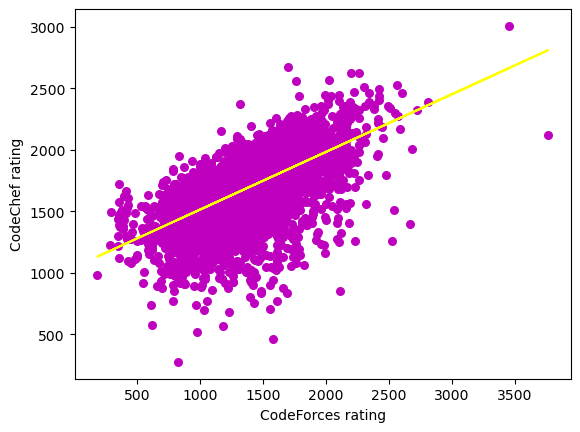

In [152]:
import numpy as np
import matplotlib.pyplot as plt
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    #Compute the covariance matrix of x
    x_center = x - m_x
    cov_matrix = x_center.T @ x_center

    cov_inv = np.linalg.inv(cov_matrix)
    
    b_1 = cov_inv @ x_center.T @ (y - m_y)
    b_0 = m_y - b_1 * m_x
    return (b_0, b_1)
  
def plot_regression_line(x, y, b_0, b_1):
    plt.scatter(x, y, color = "m",marker = "o", s = 30)
  
    # Plotting Regression line with predicted response vector
    y_pred = b_0 + b_1 * x
    plt.plot(x, y_pred, color = "yellow")
    plt.ylabel('CodeChef rating')
    plt.xlabel('CodeForces rating')
    plt.show()
  
b = estimate_coef(x1, y1)
print("Estimated coefficients:")
print("Constant b_0 =",b[0][0])
print("Slope of graph b_1 =",b[1][0])

# plotting regression line
plot_regression_line(x1, y1, b[0][0], b[1][0])

In [ ]:
b_0 = 1044.636309055616
b_1 = 0.4691287713538761

def fun1(codeforces_rating):
    codechef_rating=(codeforces_rating*b_1)+b_0
    return codechef_rating